In [ ]:
import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

ModuleNotFoundError: No module named 'rdkit'

In [ ]:
! pip3 install rdkit

import numpy as np
import rdkit
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 34.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
data=files.upload()


Saving datawarrior.csv to datawarrior.csv


In [ ]:
df = pd.read_csv('datawarriors',on_bad_lines='skip')

FileNotFoundError: [Errno 2] No such file or directory: 'curated-solubility-dataset.csv'

In [ ]:
df = pd.read_csv('datawarrior.csv',on_bad_lines='skip')

In [ ]:
df.head()

,"Molecule ChEMBL ID;""Molecule Name"";""Molecule Max Phase"";""Molecular Weight"";""#RO5 Violations"";""AlogP"";""Compound Key"";""Smiles"";""Standard Type"";""Standard Relation"";""Standard Value"";""Standard Units"";""pChEMBL Value"";""Data Validity Comment"";""Comment"";""Uo Units"";""Ligand Efficiency BEI"";""Ligand Efficiency LE"";""Ligand Efficiency LLE"";""Ligand Efficiency SEI"";""Potential Duplicate"";""Assay ChEMBL ID"";""Assay Description"";""Assay Type"";""BAO Format ID"";""BAO Label"";""Assay Organism"";""Assay Tissue ChEMBL ID"";""Assay Tissue Name"";""Assay Cell Type"";""Assay Subcellular Fraction"";""Assay Parameters"";""Assay Variant Accession"";""Assay Variant Mutation"";""Target ChEMBL ID"";""Target Name"";""Target Organism"";""Target Type"";""Document ChEMBL ID"";""Source ID"";""Source Description"";""Document Journal"";""Document Year"";""Cell ChEMBL ID"";""Properties"";""Action Type"";""Standard Text Value"""
"CHEMBL253309;"""";""None"";""563.79"";""1"";""3.30"";""3","cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)"";""CC(C)C..."
"CHEMBL269935;"""";""None"";""289.33"";""0"";""4.31"";""2"";""O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1"";""IC50"";""'>'"";""50000.0"";""nM"";"""";"""";"""";""UO_0000065"";"""";"""";"""";"""";""0"";""CHEMBL947926"";""Inhibition of HDAC6"";""B"";""BAO_0000357"";""single protein format"";""None"";""None"";""None"";""None"";""None"";"""";"""";"""";""CHEMBL1865"";""Histone deacetylase 6"";""Homo sapiens"";""SINGLE PROTEIN"";""CHEMBL1143185"";""1"";""Scientific Literature"";""Bioorg Med Chem Lett"";""2008"";""None"";"""";"""";""""",NaN
"CHEMBL437029;"""";""None"";""521.62"";""2"";""5.43"";""56"";""C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2)CCN1C(=O)OCc1ccccc1"";""IC50"";""'>'"";""50000.0"";""nM"";"""";"""";"""";""UO_0000065"";"""";"""";"""";"""";""0"";""CHEMBL947926"";""Inhibition of HDAC6"";""B"";""BAO_0000357"";""single protein format"";""None"";""None"";""None"";""None"";""None"";"""";"""";"""";""CHEMBL1865"";""Histone deacetylase 6"";""Homo sapiens"";""SINGLE PROTEIN"";""CHEMBL1143185"";""1"";""Scientific Literature"";""Bioorg Med Chem Lett"";""2008"";""None"";"""";"""";""""",NaN
"CHEMBL481148;"""";""None"";""441.62"";""0"";""4.45"";""12aw"";""CCSC(=S)SCC(=O)c1cccc(S(=O)(=O)Nc2ccc(OC)cc2)c1"";""IC50"";""'='"";""519.0"";""nM"";""6.29"";"""";"""";""UO_0000065"";""14.23"";""0.32"";""1.83"";""8.67"";""0"";""CHEMBL949572"";""Inhibition of recombinant HDAC6 expressed in HEK293 cells"";""B"";""BAO_0000219"";""cell-based format"";""None"";""None"";""None"";""HEK293"";""None"";"""";"""";"""";""CHEMBL1865"";""Histone deacetylase 6"";""Homo sapiens"";""SINGLE PROTEIN"";""CHEMBL1155020"";""1"";""Scientific Literature"";""J Med Chem"";""2008"";""CHEMBL3307715"";"""";"""";""""",NaN
"CHEMBL482271;"""";""None"";""389.57"";""0"";""4.57"";""12an"";""CCSC(=S)SCC(=O)c1ccc(CNC(=O)c2ccccc2)cc1"";""IC50"";""'='"";""301.0"";""nM"";""6.52"";"""";"""";""UO_0000065"";""16.74"";""0.36"";""1.95"";""14.12"";""0"";""CHEMBL949572"";""Inhibition of recombinant HDAC6 expressed in HEK293 cells"";""B"";""BAO_0000219"";""cell-based format"";""None"";""None"";""None"";""HEK293"";""None"";"""";"""";"""";""CHEMBL1865"";""Histone deacetylase 6"";""Homo sapiens"";""SINGLE PROTEIN"";""CHEMBL1155020"";""1"";""Scientific Literature"";""J Med Chem"";""2008"";""CHEMBL3307715"";"""";"""";""""",NaN


In [ ]:
df = pd.read_csv('datawarrior.csv', sep=';',on_bad_lines='skip')  # Use '\t' for tab-separated files


In [ ]:
df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL253309,NaN,NaN,563.79,1.0,3.30,"3, cyclo(-L-Am7(S2Py)-Aib-L-Leu-D-Pro-)",CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1140755,1,Scientific Literature,Bioorg Med Chem,2008,NaN,NaN,NaN,NaN
1,CHEMBL269935,NaN,NaN,289.33,0.0,4.31,2,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
2,CHEMBL437029,NaN,NaN,521.62,2.0,5.43,56,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1143185,1,Scientific Literature,Bioorg Med Chem Lett,2008,NaN,NaN,NaN,NaN
3,CHEMBL3639926,NaN,NaN,411.55,0.0,4.88,BDBM110013,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN
4,CHEMBL3693779,NaN,NaN,496.55,1.0,5.09,BDBM110029,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,'=',...,SINGLE PROTEIN,CHEMBL3639257,37,BindingDB Database,NaN,2013,NaN,NaN,NaN,NaN


In [ ]:
selected_columns=['Smiles','Standard Type','Standard Value']
filter_df = pd.DataFrame(df,columns=selected_columns)
filter_df.head()

,Smiles,Standard Type,Standard Value
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,230.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,50000.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,50000.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,35.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,13.0


In [ ]:
def norm_value(input_df):
    norm = []

    # Iterate over each value in the 'Standard Value' column
    for i in input_df['Standard Value']:
        # Cap the value at 100000000
        if i > 100000000:
            i = 100000000
        norm.append(i)

    # Add a new column for the normalized values
    input_df['Normalized Standard Value'] = norm

    # Drop the 'Standard Value' column
    x = input_df.drop(columns=['Standard Value'])

    # Return the modified DataFrame
    return x

# Now call the function
standard_df = norm_value(filter_df)

# Display the resulting DataFrame
standard_df


,Smiles,Standard Type,Normalized Standard Value
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08
...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,IC50,3.300000e-08
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,IC50,4.700000e-09
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,2.180000e-05
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,IC50,1.800000e-07


In [ ]:
filter_df['Normalized Standard Value'] = filter_df['Normalized Standard Value'] /1e9
filter_df.head()



,Smiles,Standard Type,Standard Value,Normalized Standard Value
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07,2.300000e-16
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05,5.000000e-14
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05,5.000000e-14
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08,3.500000e-17
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08,1.300000e-17


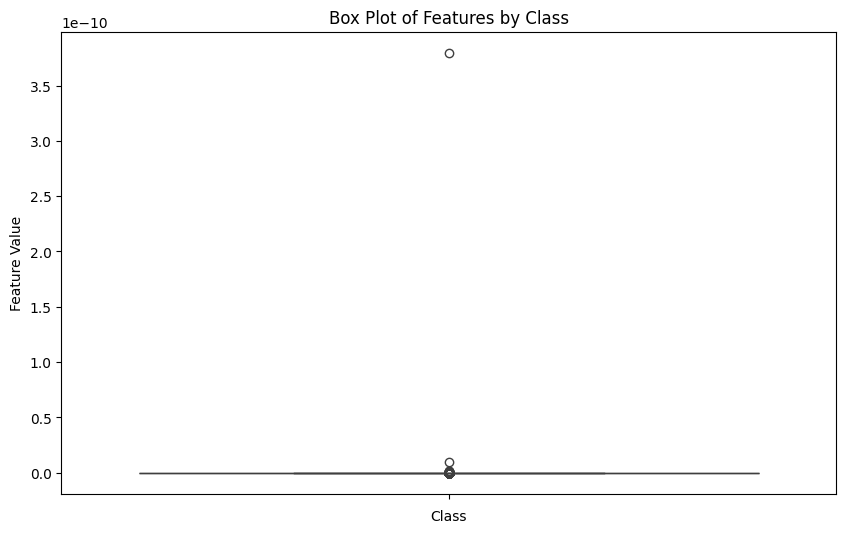

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Normalized Standard Value', data=filter_df)
plt.title('Box Plot of Features by Class')
plt.xlabel('Class')
plt.ylabel('Feature Value')
plt.show()


In [ ]:
filter_df['pIC50'] = -np.log10(filter_df['Normalized Standard Value'])


In [ ]:
filter_df['pIC50'].max()


20.69897000433602

In [ ]:
filter_df['pIC50'].min()

9.420559402860203

In [ ]:
#division into classes based on biological analysis :
#RANK 1- high solubility
#RANK 2 - moderate solubility
#RANK 3 - low solubility

pIC50_threshold=[]

for i in filter_df.pIC50:
  if float(i) > 7:
      pIC50_threshold.append("Rank I")
  elif float(i) > 5:
      pIC50_threshold.append("Rank II")
  else:
      pIC50_threshold.append("Rank III")

In [ ]:
count_r1=0
for ele in pIC50_threshold:
  if ele=="Rank I":count_r1+=1

print(count_r1)

6299


In [ ]:
pIC50_class = pd.Series(pIC50_threshold, name='pIC50_class')
final_df = pd.concat([filter_df, pIC50_class], axis=1)
final_df.head()

,Smiles,Standard Type,Standard Value,Normalized Standard Value,pIC50,pIC50_class
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07,2.300000e-16,15.638272,Rank I
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05,5.000000e-14,13.301030,Rank I
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05,5.000000e-14,13.301030,Rank I
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08,3.500000e-17,16.455932,Rank I
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08,1.300000e-17,16.886057,Rank I


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [ ]:
descriptor_names = [desc_name[0] for desc_name in Descriptors._descList] #208, list exists in rdkit, wol wt

calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)

def calculate_descriptors(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles) # converting smiles to "molecular object"
        if mol is not None:
            return calculator.CalcDescriptors(mol)
        else:
            return [None] * len(descriptor_names)
    except:
        return [None] * len(descriptor_names)

descriptors = filter_df['Smiles'].apply(calculate_descriptors) # applying the function to generate descriptors on the SMILES column in our original dataframe
desc = pd.DataFrame(descriptors.tolist(), columns=descriptor_names) # Adding these descriptors to a new data frame, whose column heading is the descriptor name
results_df = pd.concat([final_df, desc], axis=1) # make a final data frame by joing original df and df of chemical desciptors


Streaming output truncated to the last 5000 lines.
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:12:49] DEPRECATION WARNING: please use MorganGenerator
[05:1

In [ ]:
results_df

,Smiles,Standard Type,Standard Value,Normalized Standard Value,pIC50,pIC50_class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07,2.300000e-16,15.638272,Rank I,13.450481,13.450481,0.167702,-1.237584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05,5.000000e-14,13.301030,Rank I,12.191887,12.191887,0.045335,-0.248971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05,5.000000e-14,13.301030,Rank I,12.957424,12.957424,0.049385,-0.317974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08,3.500000e-17,16.455932,Rank I,12.632866,12.632866,0.003616,-0.353767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08,1.300000e-17,16.886057,Rank I,13.653820,13.653820,0.215010,-1.135580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6483,O=C(CCCCCCC(=O)Nc1ccccc1)NO,IC50,3.300000e-08,3.300000e-17,16.481486,Rank I,11.591415,11.591415,0.013242,-0.359425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
6484,O=C(CCCCCCNC(=O)c1cnc(N(c2ccccc2)c2ccccc2)nc1)NO,IC50,4.700000e-09,4.700000e-18,17.327902,Rank I,12.397419,12.397419,0.220203,-0.375145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
6485,CNc1nc(Cl)nc2c1ncn2Cc1ccc(C(=O)Nc2ccccc2N)cc1,IC50,2.180000e-05,2.180000e-14,13.661544,Rank I,12.456997,12.456997,0.148893,-0.221560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6486,Cc1cc(C)c(CNC(=O)c2cc(-c3ccc(NC(=O)CCCCCCC(=O)...,IC50,1.800000e-07,1.800000e-16,15.744727,Rank I,13.512158,13.512158,0.074127,-0.400800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [ ]:
# dropping any missing values
cleaned_final = results_df.dropna()
print(f"Original DataFrame shape: {results_df.shape}")
print(f"Cleaned DataFrame shape: {cleaned_final.shape}")

Original DataFrame shape: (6488, 216)
Cleaned DataFrame shape: (6272, 216)


In [ ]:
#checking the number of compounds in each class now(after dropping nan values)
c=0
check=cleaned_final['pIC50_class']
for ele in check:
  if ele=='Rank III': c+=1

print(c)

0


In [ ]:
cleaned_final.head()

,Smiles,Standard Type,Standard Value,Normalized Standard Value,pIC50,pIC50_class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,2.300000e-07,2.300000e-16,15.638272,Rank I,13.450481,13.450481,0.167702,-1.237584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,5.000000e-05,5.000000e-14,13.301030,Rank I,12.191887,12.191887,0.045335,-0.248971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,5.000000e-05,5.000000e-14,13.301030,Rank I,12.957424,12.957424,0.049385,-0.317974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,3.500000e-08,3.500000e-17,16.455932,Rank I,12.632866,12.632866,0.003616,-0.353767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,1.300000e-08,1.300000e-17,16.886057,Rank I,13.653820,13.653820,0.215010,-1.135580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [ ]:
from sklearn.preprocessing import RobustScaler # robust to outliers
df_robust = cleaned_final.copy()

# numeric columns excluding 'solubility' which is our target column for prediction by model
numeric_columns = df_robust.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'pIC50'] # dont scale y!

scaler = RobustScaler()

# scale selected numeric columns
df_robust[numeric_columns] = scaler.fit_transform(df_robust[numeric_columns])

df_robust.head()

,Smiles,Standard Type,Standard Value,Normalized Standard Value,pIC50,pIC50_class,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@@H]1NC(=O)C(C)(C)NC(=O)[C@H](CCCCCSSc...,IC50,0.055734,1.000000e-16,15.638272,Rank I,0.653725,0.653725,0.290430,-1.745846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,O=C(Nc1cc(-c2ccccc2)ccc1O)c1ccccc1,IC50,27.794343,4.987000e-14,13.301030,Rank I,-0.154252,-0.154252,-0.417777,0.778691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C[C@H]1CN(c2ccc(C(=O)Nc3cc(-c4ccccc4)ccc3N)cn2...,IC50,27.794343,4.987000e-14,13.301030,Rank I,0.337199,0.337199,-0.394342,0.602483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cc1cc(C)c(Nc2ccc(C(=O)N(C)CCCCCCC(=O)NO)cc2)c(...,IC50,-0.052947,-9.500000e-17,16.455932,Rank I,0.128842,0.128842,-0.659231,0.511082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
4,COC(c1ccc(F)cc1)(c1ccc(F)cc1)c1ccc(C(=O)NCCCCC...,IC50,-0.065208,-1.170000e-16,16.886057,Rank I,0.784263,0.784263,0.564227,-1.485368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0


In [ ]:
df_robust.shape

(6272, 216)

In [ ]:
#there are some invalid entries(values tending to infinity) that were giving errors in the subsequent steps, this code is to remove those invalid entries

invalid_count = 0

# Maximum value for float32
float32_threshold = np.finfo(np.float32).max

# Iterate through all rows and columns
rows_to_drop = []

for index, row in df_robust.iterrows():
    for value in row:
        # Check if the value is numeric before applying isinf or comparing thresholds
        if pd.api.types.is_numeric_dtype(type(value)):
            if pd.isnull(value) or np.isinf(value) or abs(value) > float32_threshold:
                rows_to_drop.append(index)
                invalid_count += 1
                break  # Break after marking the row to drop
        else:
            # If it's not numeric, just check for NaN
            if pd.isnull(value):
                rows_to_drop.append(index)
                invalid_count += 1
                break

# Drop rows that contain invalid values
df_robust.drop(rows_to_drop, inplace=True)

# Output the number of invalid entries dropped
print(f"Dropped {invalid_count} invalid entries.")


Dropped 0 invalid entries.


In [ ]:
#spitting into X features and y target for model
y = df_robust['pIC50_class']
X = df_robust.drop(columns=['Smiles', 'pIC50','pIC50_class'])

In [ ]:
print(y.head())
print(X.head())

0    Rank I
1    Rank I
2    Rank I
3    Rank I
4    Rank I
Name: pIC50_class, dtype: object
  Standard Type  Standard Value  Normalized Standard Value  MaxAbsEStateIndex  \
0          IC50        0.055734               1.000000e-16           0.653725   
1          IC50       27.794343               4.987000e-14          -0.154252   
2          IC50       27.794343               4.987000e-14           0.337199   
3          IC50       -0.052947              -9.500000e-17           0.128842   
4          IC50       -0.065208              -1.170000e-16           0.784263   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed       SPS  \
0        0.653725           0.290430       -1.745846 -0.234714  2.927289   
1       -0.154252          -0.417777        0.778691  1.143936 -0.320234   
2        0.337199          -0.394342        0.602483 -0.123327  0.804894   
3        0.128842          -0.659231        0.511082 -0.233335 -0.231312   
4        0.784263           0.564227    

In [ ]:
#FEATURE SELECTION - can be done using rfe or feature importance
#you can experiment using different number of features and examining the model performance in the subsequent steps

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the RandomForestClassifier on the entire dataset
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to map features to their importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 25 features
selected_features = importance_df.head(25)['Feature'].tolist()

print("Top n features:", selected_features)




ValueError: could not convert string to float: 'IC50'

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Step 2: Load your dataset (you already have this)
# Assuming you have a DataFrame 'df' already loaded with features and the target column 'pIC50_class'

# Step 4: Initialize the RandomForestClassifier as the estimator
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 5: Initialize RFE and fit to select top 25 features
rfe = RFE(estimator=estimator, n_features_to_select=25, step=1)
rfe.fit(X, y)

# Step 6: Retrieve the rankings and selected features
selected_features = X.columns[rfe.support_].tolist()  # List of top 25 features
print("Top 25 selected features using RFE:")
print(selected_features)


ValueError: could not convert string to float: 'IC50'